In [1]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import tensorflow as tf
import math
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [8]:
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

# test_datagen = ImageDataGenerator(rescale=1./255)

In [17]:
img_height = img_width = 150

train_generator = training_datagen.flow_from_directory(
    'workspace/catdog-images/train',
    target_size=(img_height,img_width),
    class_mode='categorical')

val_generator = val_datagen.flow_from_directory(
    'workspace/catdog-images/val',
    target_size=(img_height,img_width),
    class_mode='categorical')

# test_generator = test_datagen.flow_from_directory(
#     'workspace/catdog-images/test',
#     target_size=(img_height,img_width),
#     class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [18]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [19]:
model.summary()

METRICS = [
    tf.keras.metrics.BinaryAccuracy(name="accuracy"),
    tf.keras.metrics.Precision(name="precision"),
    tf.keras.metrics.Recall(name="recall"),
    tf.keras.metrics.AUC(name="auc"),
]
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 128)      

In [20]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    verbose=1
)
# model.evaluate(test_generator, verbose=1)

Epoch 1/10
63/63 [==============================] - 14s 202ms/step - loss: 0.6944 - accuracy: 0.5165 - val_loss: 0.6841 - val_accuracy: 0.5010
Epoch 2/10
63/63 [==============================] - 11s 168ms/step - loss: 0.6833 - accuracy: 0.5630 - val_loss: 0.6653 - val_accuracy: 0.6150
Epoch 3/10
63/63 [==============================] - 11s 167ms/step - loss: 0.6768 - accuracy: 0.5665 - val_loss: 0.6463 - val_accuracy: 0.6380
Epoch 4/10
63/63 [==============================] - 11s 168ms/step - loss: 0.6671 - accuracy: 0.5810 - val_loss: 0.6289 - val_accuracy: 0.6480
Epoch 5/10
63/63 [==============================] - 11s 169ms/step - loss: 0.6558 - accuracy: 0.6070 - val_loss: 0.6122 - val_accuracy: 0.6680
Epoch 6/10
63/63 [==============================] - 11s 180ms/step - loss: 0.6378 - accuracy: 0.6295 - val_loss: 0.6102 - val_accuracy: 0.6460
Epoch 7/10
63/63 [==============================] - 13s 198ms/step - loss: 0.6288 - accuracy: 0.6380 - val_loss: 0.5831 - val_accuracy: 0.6980

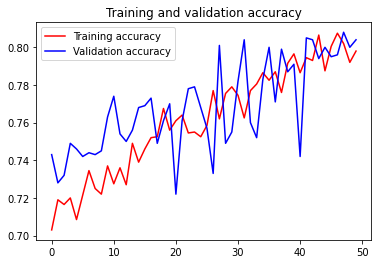

<Figure size 432x288 with 0 Axes>

In [39]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

{'cats': 0, 'dogs': 1}
[[1.]]


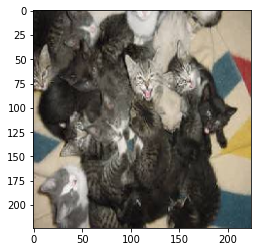

In [56]:
# model = load_model('./rps.h5')

path = os.path.join('workspace', 'catdog-images', 'val', 'cats', 'cat.2001.jpg')
img = image.load_img(path, target_size=(150, 150))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images)
# predict=model.predict(images) 
# classes=np.argmax(predict,axis=1)
p = train_generator.class_indices
print(p)
plt.imshow(img)
print(classes)